# Regression Problem: House Sales in King County, USA

King County is located in the U.S. state of Washington and is one of the most populous counties in the country. It encompasses a diverse range of landscapes, including urban areas, suburban neighborhoods, rural communities, and vast natural reserves. At its core is the city of Seattle, one of the major economic and cultural hubs of the Pacific Northwest.

The dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015. Our task is to predict the price of house given it's attibutes.

### Data column defination -

**id** - Unique ID for each home sold<br>
**date** - Date of the home sale<br>
**price** - Price of each home sold (scale = 1e5. For eg - 1.2 means $120000)<br>
**bedrooms** - Number of bedrooms<br>
**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
**sqft_living** - Square footage of the apartments interior living space<br>
**sqft_lot** - Square footage of the land space<br>
**floors** - Number of floors<br>
**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
**view** - An index from 0 to 4 of how good the view of the property was<br>
**condition** - An index from 1 to 5 on the condition of the apartment<br>
**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design<br>
**sqft_above** - The square footage of the interior housing space that is above ground level<br>
**sqft_basement** - The square footage of the interior housing space that is below ground level<br>
**yr_built** - The year the house was initially built<br>
**yr_renovated** - The year of the house’s last renovation<br>
**zipcode** - What zipcode area the house is in<br>
**lat** - Lattitude<br>
**long** - Longitude<br>
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors<br>
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors<br>

## Load Dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1: Data Analysis (10 points)

Explore the data to find any relationship between the target variable and the input variables.

Start with providing some descriptive statistics of the data with visualizations.

Are there any missing values? Are there any outliers? What is the relationship between the input variables and the target variable. Show some statistical plots to get some insights about the relationship between data attributes and the data attibutes with the label.

In [ ]:
train_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2254502445,20140530T000000,3,1.00,1220.0,4800,1.0,0,0.0,3,...,1220,0,1901,0,98122,47.6101,-122.307,1200,4800,3.85
1,126059019,20150316T000000,4,2.50,3170.0,94855,1.0,0,0.0,4,...,1910,1260,1978,0,98072,47.7648,-122.112,2590,65340,7.99
2,8825900020,20140811T000000,5,3.00,2710.0,4200,2.0,0,0.0,3,...,1890,820,1919,2014,98115,47.6754,-122.307,2150,4200,9.25
3,9465910380,20141024T000000,4,2.25,2850.0,7453,2.0,0,NaN,3,...,2850,0,1991,0,98072,47.7439,-122.174,2700,8468,5.40
4,7784400060,20150120T000000,3,2.50,2370.0,9000,1.0,0,3.0,4,...,1570,800,1952,0,98146,47.4922,-122.365,2120,9500,5.45


In [ ]:
train_df.shape


(19451, 21)

In [ ]:
train_df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.945100e+04,19451.000000,19451.000000,18857.000000,1.945100e+04,19451.000000,19451.000000,18478.000000,19451.000000,18078.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000
mean,4.579305e+09,3.374891,2.117115,2083.822824,1.526233e+04,1.496607,0.007609,0.233792,3.408308,7.656710,1791.785050,291.871112,1971.067297,85.569482,98077.921289,47.559796,-122.214411,1987.574726,12847.165544,5.404026
std,2.876637e+09,0.931878,0.770603,921.655939,4.246746e+04,0.540055,0.086899,0.764109,0.650853,1.174811,831.295886,442.540100,29.355603,404.311212,53.541892,0.138688,0.140509,686.225019,27492.540347,3.686557
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,0.750000
25%,2.124084e+09,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469500,-122.329000,1490.000000,5100.000000,3.210000
50%,3.904921e+09,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1840.000000,7620.000000,4.500000
75%,7.304801e+09,4.000000,2.500000,2550.000000,1.071800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98118.000000,47.677700,-122.126000,2360.000000,10087.000000,6.450000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,77.000000


In [ ]:
test_df.shape

(2162, 20)

In [ ]:
test_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1930300915,20140820T000000,3,1.00,1240.0,4800,1.0,0,0.0,3,7.0,800,440,1951,0,98103,47.6563,-122.353,1440,4800
1,8861000060,20141231T000000,3,1.00,1160.0,10732,1.0,0,0.0,3,7.0,1160,0,1953,0,98004,47.6391,-122.205,2390,13656
2,7701960720,20141017T000000,4,2.50,4200.0,35267,2.0,0,0.0,3,11.0,4200,0,1990,0,98077,47.7108,-122.071,3540,22234
3,7338401230,20140828T000000,3,1.75,1020.0,5000,1.0,0,0.0,5,NaN,1020,0,1954,0,98118,47.5332,-122.290,1360,5000
4,1022059161,20140613T000000,4,2.25,2630.0,39000,2.0,0,0.0,3,9.0,2630,0,1979,0,98042,47.4089,-122.149,2270,66647


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19451 non-null  int64  
 1   date           18693 non-null  object 
 2   bedrooms       19451 non-null  int64  
 3   bathrooms      19451 non-null  float64
 4   sqft_living    18857 non-null  float64
 5   sqft_lot       19451 non-null  int64  
 6   floors         19451 non-null  float64
 7   waterfront     19451 non-null  int64  
 8   view           18478 non-null  float64
 9   condition      19451 non-null  int64  
 10  grade          18078 non-null  float64
 11  sqft_above     19451 non-null  int64  
 12  sqft_basement  19451 non-null  int64  
 13  yr_built       19451 non-null  int64  
 14  yr_renovated   19451 non-null  int64  
 15  zipcode        19451 non-null  int64  
 16  lat            19451 non-null  float64
 17  long           19451 non-null  float64
 18  sqft_l

In [ ]:
continuous_features = [column for column in train_df.columns if train_df[column].dtype in ['int64', 'float64']]
categorical_features = [column for column in train_df.columns if train_df[column].dtype == 'object']

In [ ]:
continuous_features

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [ ]:
categorical_features

['date']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




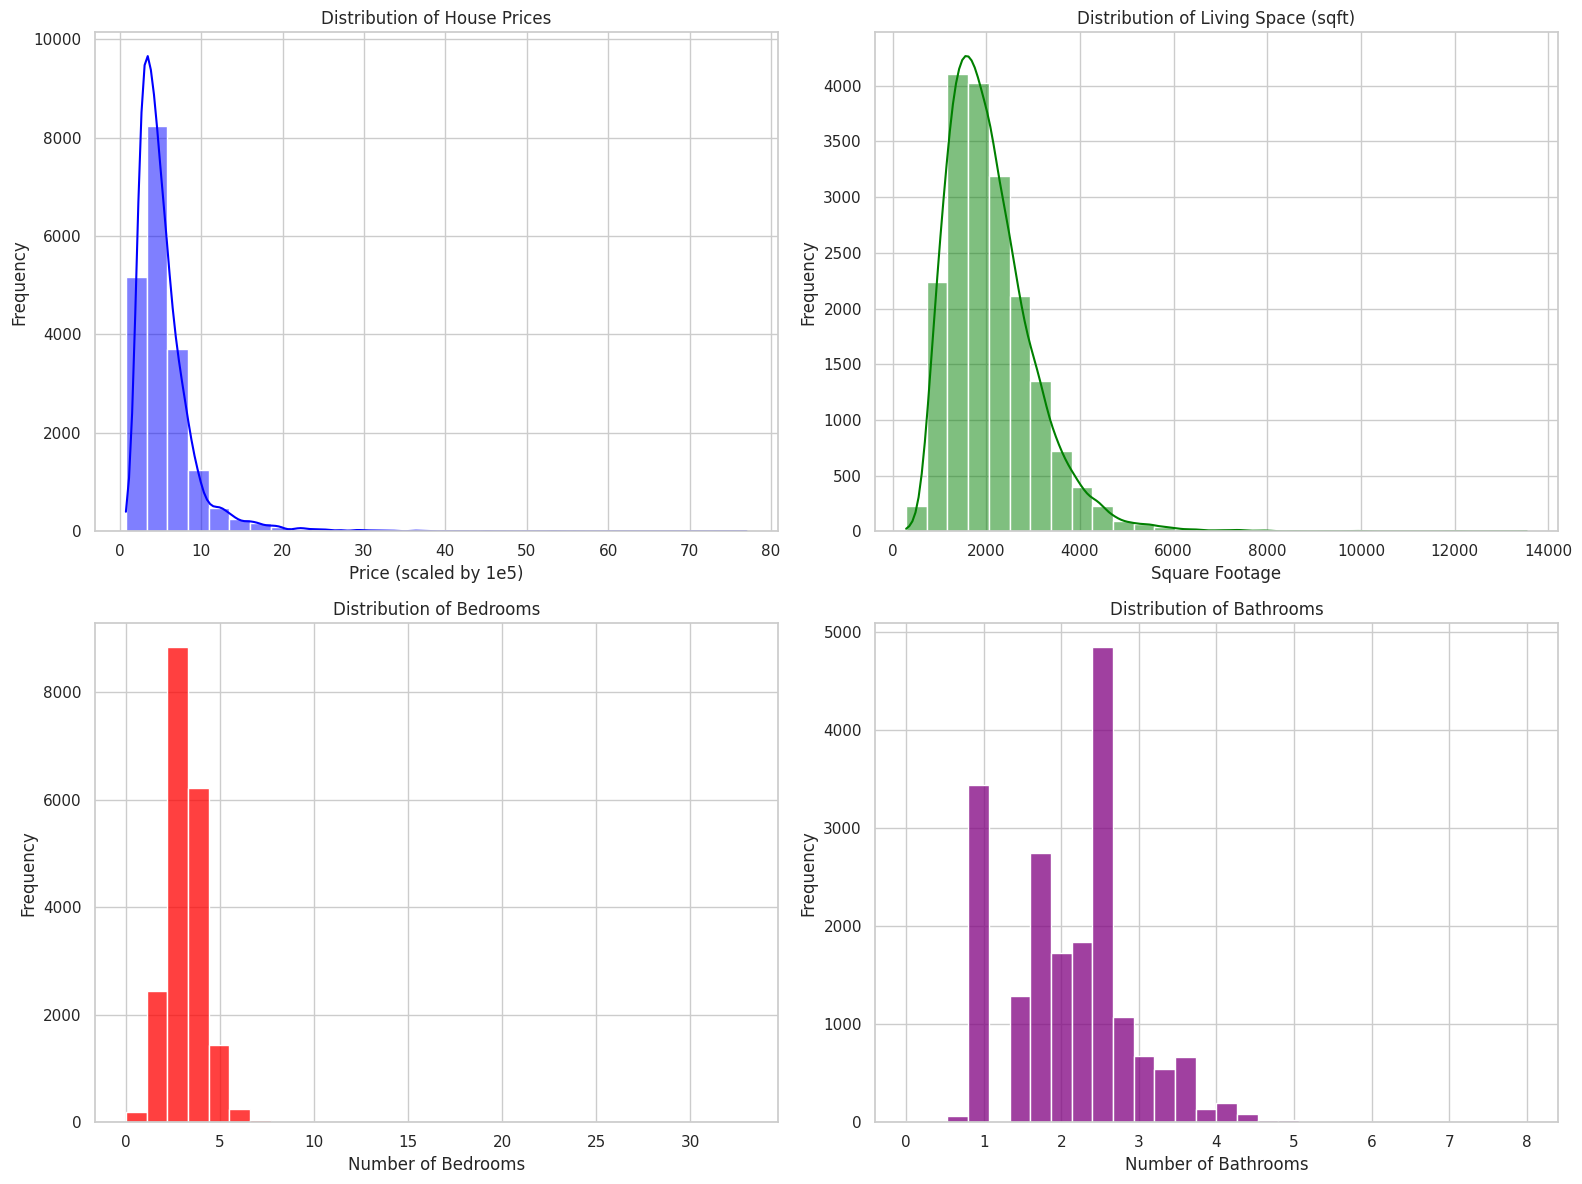

In [ ]:

sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plotting the distribution of key variables
sns.histplot(train_df['price'], kde=True, bins=30, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of House Prices')
axes[0, 0].set_xlabel('Price (scaled by 1e5)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(train_df['sqft_living'].dropna(), kde=True, bins=30, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Living Space (sqft)')
axes[0, 1].set_xlabel('Square Footage')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(train_df['bedrooms'], kde=False, bins=30, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Bedrooms')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(train_df['bathrooms'], kde=False, bins=30, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Bathrooms')
axes[1, 1].set_xlabel('Number of Bathrooms')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms above visualize the distribution of key variables in the dataset, including the target variable (price) and other significant predictors such as sqft_living, bedrooms, and bathrooms.

Distribution of House Prices: The histogram for price shows a right-skewed distribution, indicating that most houses are priced at the lower end of the scale, with a few exceptions being significantly more expensive.
Distribution of Living Space (sqft_living): The living space distribution is also right-skewed, suggesting that while most houses have smaller living areas, there are a few with substantially larger living spaces.
Distribution of Bedrooms: The distribution of bedrooms shows that the majority of houses have between 2 to 4 bedrooms, with a steep drop-off for houses with more than 5 bedrooms.
Distribution of Bathrooms: Similar to bedrooms, the distribution of bathrooms is skewed towards houses with fewer bathrooms, predominantly ranging from 1 to 3, with fewer homes having more than that.

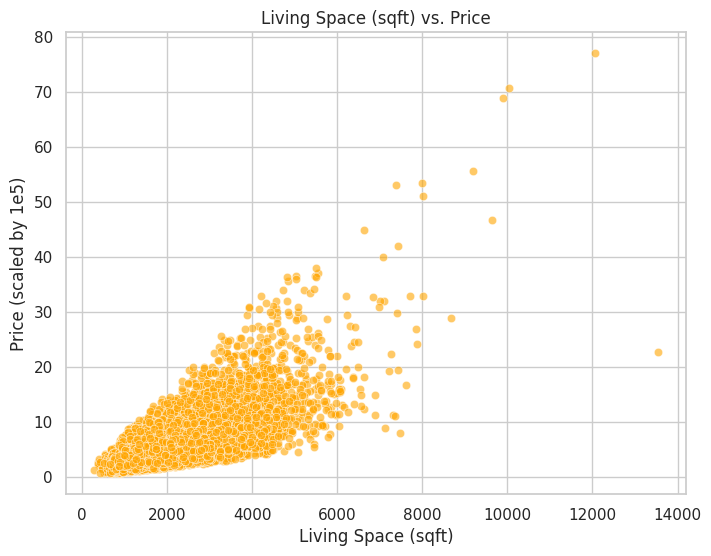

In [ ]:
# Creating a scatter plot for sqft_living vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=train_df, color='orange', alpha=0.6)

plt.title('Living Space (sqft) vs. Price')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price (scaled by 1e5)')
plt.show()


The scatter plot above illustrates the relationship between the living space (in square feet) and the price of houses. It's evident that there is a positive correlation between these two variables: as the living space increases, the price of the house also tends to increase. This trend suggests that larger homes generally command higher prices, which is an intuitive finding and aligns with common real estate valuation principles.

<ipython-input-14-b2c120dc5727>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=train_df, ax=axes[0, 0], palette="cool")
<ipython-input-14-b2c120dc5727>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bathrooms', y='price', data=train_df, ax=axes[0, 1], palette="coolwarm")
<ipython-input-14-b2c120dc5727>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='floors', y='price', data=train_df, ax=axes[1, 0], palette="viridis")
<ipython-input-14-b2c120dc5727>:26: FutureWarning: 

Passing `palette` without assi

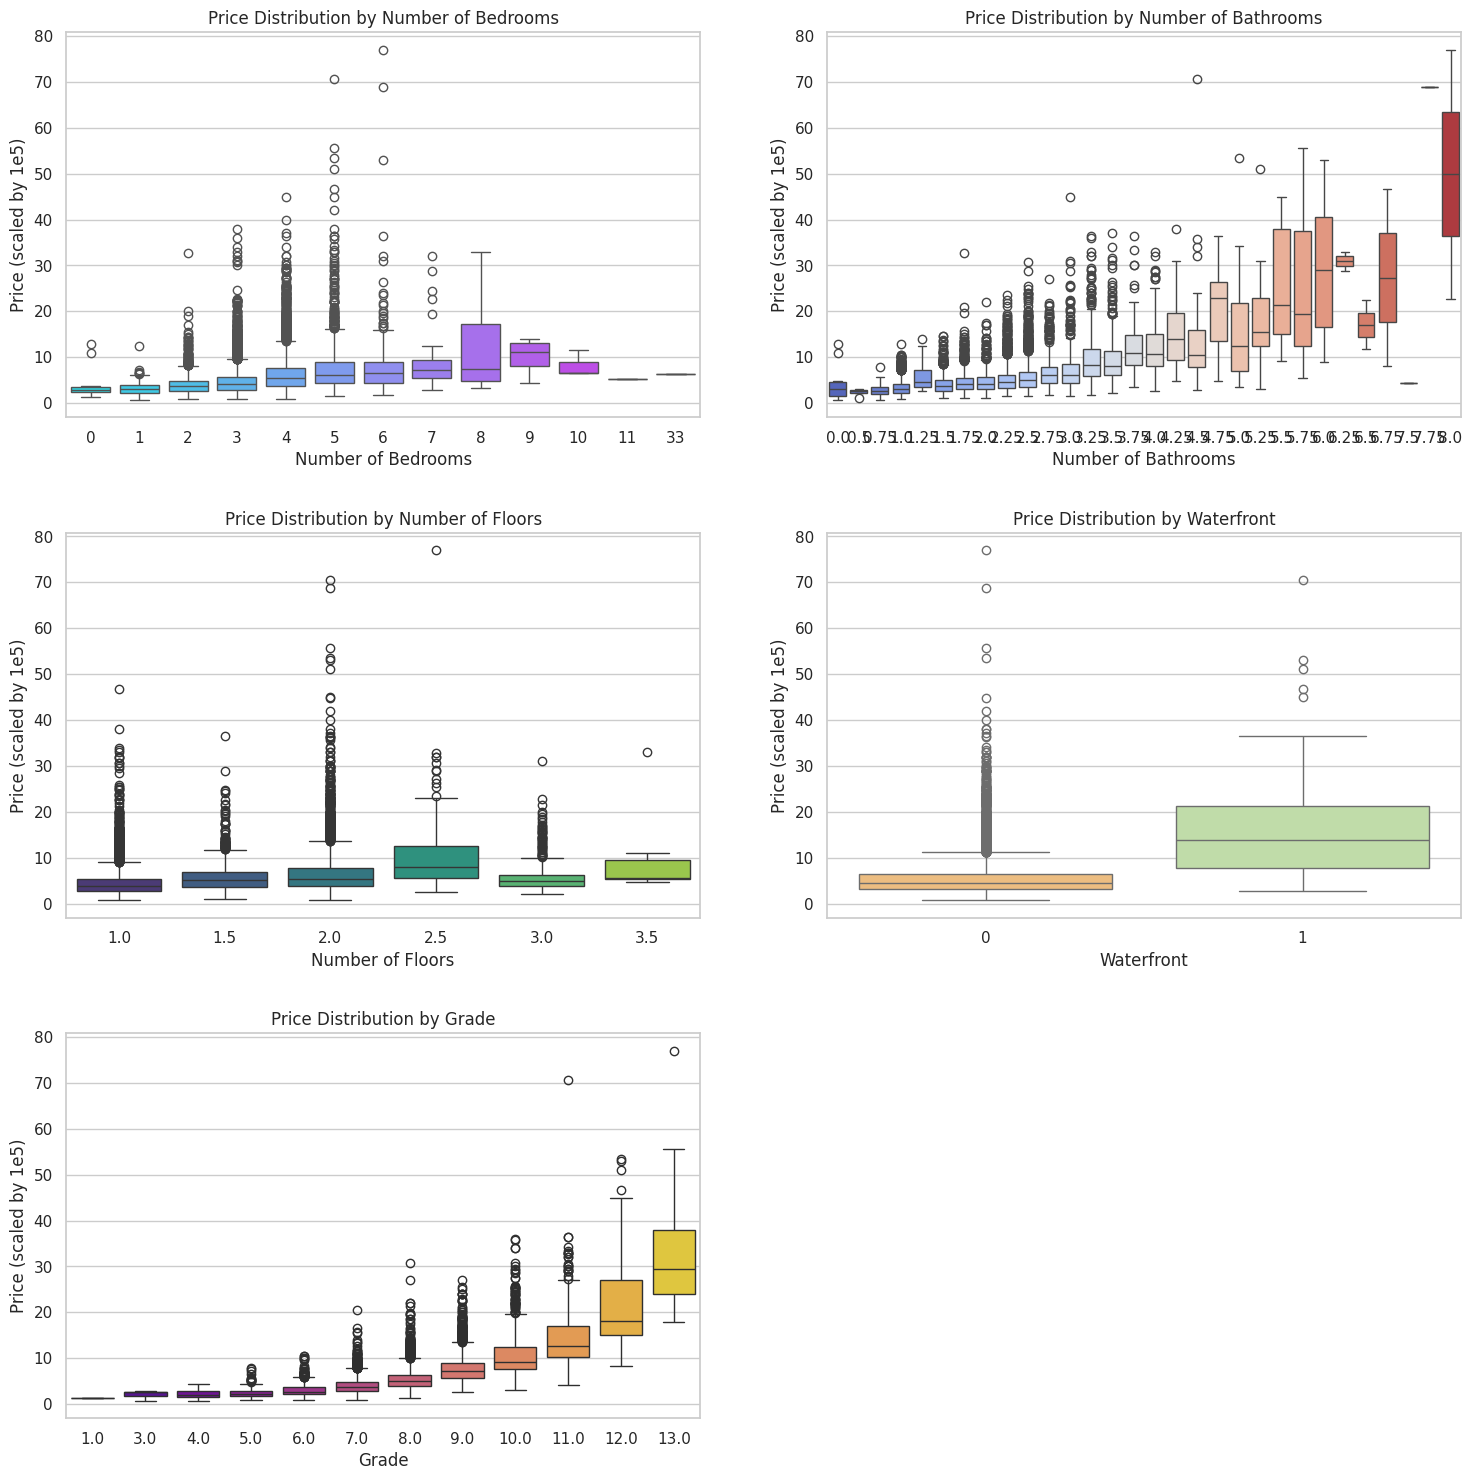

In [ ]:
# Creating a figure to hold the subplots for box plots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Adjusting layout
plt.subplots_adjust(hspace=0.3)

# Box plot for bedrooms
sns.boxplot(x='bedrooms', y='price', data=train_df, ax=axes[0, 0], palette="cool")
axes[0, 0].set_title('Price Distribution by Number of Bedrooms')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Price (scaled by 1e5)')

# Box plot for bathrooms
sns.boxplot(x='bathrooms', y='price', data=train_df, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title('Price Distribution by Number of Bathrooms')
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Price (scaled by 1e5)')

# Box plot for floors
sns.boxplot(x='floors', y='price', data=train_df, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Price Distribution by Number of Floors')
axes[1, 0].set_xlabel('Number of Floors')
axes[1, 0].set_ylabel('Price (scaled by 1e5)')

# Box plot for waterfront
sns.boxplot(x='waterfront', y='price', data=train_df, ax=axes[1, 1], palette="Spectral")
axes[1, 1].set_title('Price Distribution by Waterfront')
axes[1, 1].set_xlabel('Waterfront')
axes[1, 1].set_ylabel('Price (scaled by 1e5)')

# Box plot for grade
sns.boxplot(x='grade', y='price', data=train_df, ax=axes[2, 0], palette="plasma")
axes[2, 0].set_title('Price Distribution by Grade')
axes[2, 0].set_xlabel('Grade')
axes[2, 0].set_ylabel('Price (scaled by 1e5)')

# Adjusting layout for the last empty subplot
fig.delaxes(axes[2][1])

plt.show()


The box plots above showcase how different factors affect house prices in the dataset:

Price Distribution by Number of Bedrooms: There's a trend showing that as the number of bedrooms increases, the median price generally increases. However, there's significant variability, especially for houses with a higher number of bedrooms, indicating other factors also play a critical role in determining price.

Price Distribution by Number of Bathrooms: Similar to bedrooms, an increase in the number of bathrooms tends to correspond with an increase in price. The variability in price also increases with the number of bathrooms, suggesting a wide range of house qualities and locations.

Price Distribution by Number of Floors: The number of floors shows a more subtle impact on price compared to bedrooms and bathrooms. While there is some indication that houses with more floors might command higher prices, the effect is less pronounced.

Price Distribution by Waterfront: There's a clear distinction in price between waterfront and non-waterfront properties, with waterfront properties typically having a higher median price. This suggests that being on the waterfront is a significant premium feature for houses.

Price Distribution by Grade: The grade, which assesses the construction quality and design of the house, shows a strong positive relationship with price. Higher-grade houses have significantly higher median prices, indicating the importance of house quality in determining its price.



In [ ]:
#checking for missing values
missing_values = train_df.isnull().sum()
print(missing_values)


id                  0
date              758
bedrooms            0
bathrooms           0
sqft_living       594
sqft_lot            0
floors              0
waterfront          0
view              973
condition           0
grade            1373
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64


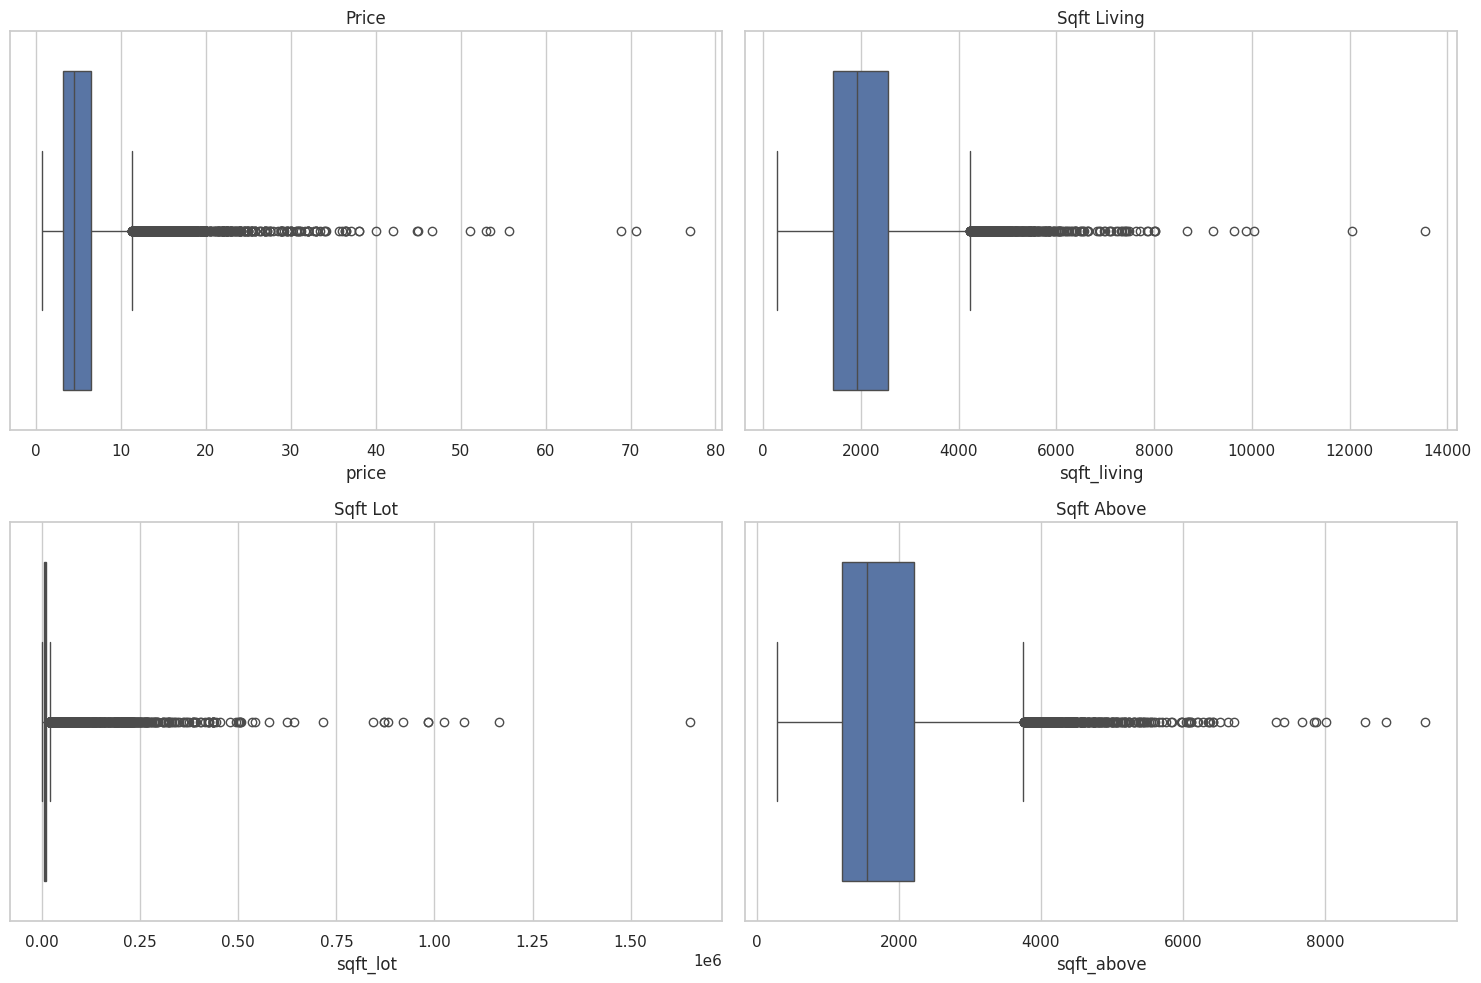

In [ ]:
# Checking for outliers using box plots
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x=train_df['price'])
plt.title('Price')

plt.subplot(2, 2, 2)
sns.boxplot(x=train_df['sqft_living'])
plt.title('Sqft Living')

plt.subplot(2, 2, 3)
sns.boxplot(x=train_df['sqft_lot'])
plt.title('Sqft Lot')

plt.subplot(2, 2, 4)
sns.boxplot(x=train_df['sqft_above'])
plt.title('Sqft Above')

plt.tight_layout()
plt.show()

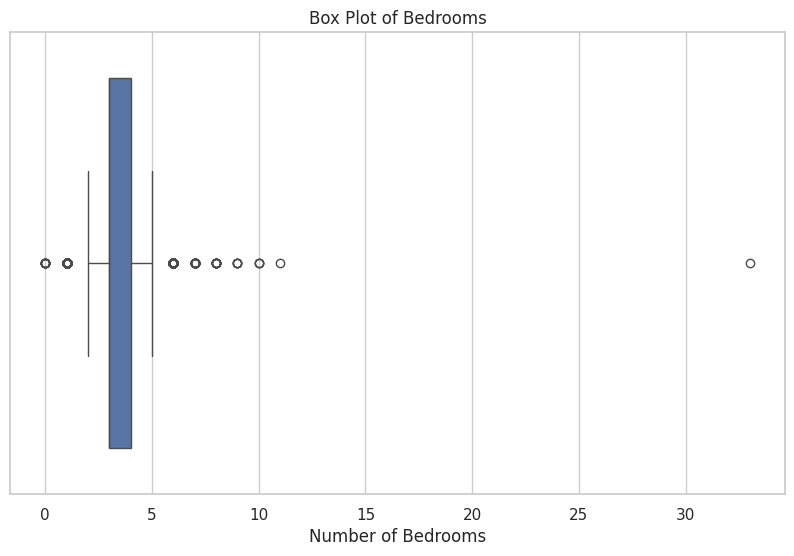

In [ ]:
# Creating a box plot to visualize outliers in the 'bedrooms' variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['bedrooms'])
plt.title('Box Plot of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.show()


The extremely high maximum value for bedrooms (33) suggests the presence of outliers which could skew the analysis.

<ipython-input-18-519b05441338>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

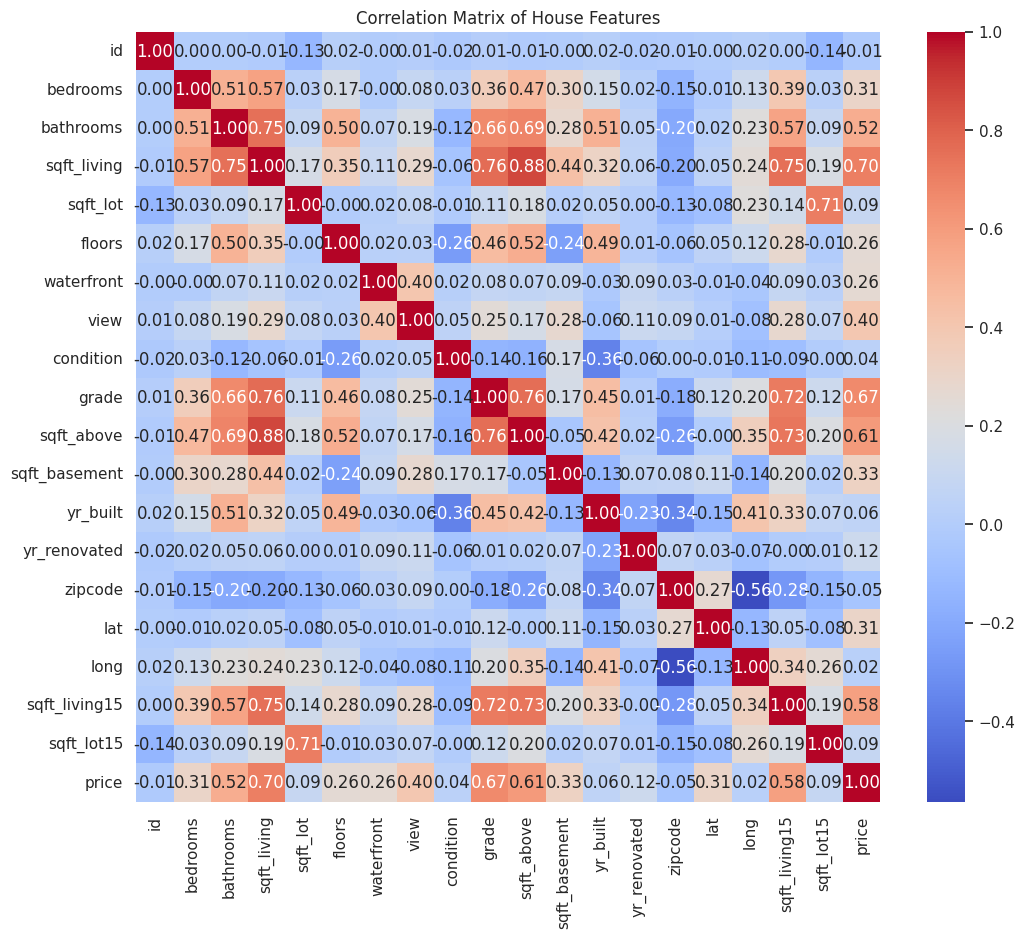

In [ ]:
# Setting up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generating correlation matrix
corr_matrix = train_df.corr()

# Generating a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Showing the plot
plt.title('Correlation Matrix of House Features')
plt.show

The heatmap of the correlation matrix provides insights into how different variables are related to each other and, most importantly, to the price. Key observations include:

Strong Positive Correlation: sqft_living, grade, and sqft_above show a strong positive correlation with price, indicating that larger, higher-grade houses tend to have higher prices.
Moderate Positive Correlation: Variables such as bathrooms, view, and sqft_living15 also show a positive relationship with price, albeit less strong than the former variables.
Weak Correlation: Variables like condition and yr_built show a weaker correlation with price.

## Question 2: Data pre-processing & Feature Engineering (20 points)

After getting some insights about the relationships through the EDA process, now move on to clean and preprocess the data.

How are you going to deal with the missing values? How are you going to deal with the numerical and categorical columns? Are all the attributes relevant? Does any feature need to be reengineered?

In [ ]:
#train_df.drop('date', axis=1, inplace=True)
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y%m%dT%H%M%S')

# Extracting year and month into separate columns
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df.drop('date', axis=1, inplace=True)

train_df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
0,2254502445,3,1.00,1220.0,4800,1.0,0,0.0,3,6.0,...,1901,0,98122,47.6101,-122.307,1200,4800,3.85,2014.0,5.0
1,126059019,4,2.50,3170.0,94855,1.0,0,0.0,4,9.0,...,1978,0,98072,47.7648,-122.112,2590,65340,7.99,2015.0,3.0
2,8825900020,5,3.00,2710.0,4200,2.0,0,0.0,3,7.0,...,1919,2014,98115,47.6754,-122.307,2150,4200,9.25,2014.0,8.0
3,9465910380,4,2.25,2850.0,7453,2.0,0,NaN,3,9.0,...,1991,0,98072,47.7439,-122.174,2700,8468,5.40,2014.0,10.0
4,7784400060,3,2.50,2370.0,9000,1.0,0,3.0,4,8.0,...,1952,0,98146,47.4922,-122.365,2120,9500,5.45,2015.0,1.0


In [ ]:



test_df['date'] = pd.to_datetime(test_df['date'], format='%Y%m%dT%H%M%S')
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month


test_df.drop('date', axis=1, inplace=True)

print(test_df.head())


           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  1930300915         3       1.00       1240.0      4800     1.0           0   
1  8861000060         3       1.00       1160.0     10732     1.0           0   
2  7701960720         4       2.50       4200.0     35267     2.0           0   
3  7338401230         3       1.75       1020.0      5000     1.0           0   
4  1022059161         4       2.25       2630.0     39000     2.0           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0   0.0          3    7.0  ...            440      1951             0   
1   0.0          3    7.0  ...              0      1953             0   
2   0.0          3   11.0  ...              0      1990             0   
3   0.0          5    NaN  ...              0      1954             0   
4   0.0          3    9.0  ...              0      1979             0   

   zipcode      lat     long  sqft_living15  sqft_lot15    year  month  
0

'date' is the only categorical values. 'date' was in the format 'YYYYMMDDT000000'. so converted 'date' into date format and feature engineered to two different attributes 'year' and 'month'.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19451 non-null  int64  
 1   bedrooms       19451 non-null  int64  
 2   bathrooms      19451 non-null  float64
 3   sqft_living    18857 non-null  float64
 4   sqft_lot       19451 non-null  int64  
 5   floors         19451 non-null  float64
 6   waterfront     19451 non-null  int64  
 7   view           18478 non-null  float64
 8   condition      19451 non-null  int64  
 9   grade          18078 non-null  float64
 10  sqft_above     19451 non-null  int64  
 11  sqft_basement  19451 non-null  int64  
 12  yr_built       19451 non-null  int64  
 13  yr_renovated   19451 non-null  int64  
 14  zipcode        19451 non-null  int64  
 15  lat            19451 non-null  float64
 16  long           19451 non-null  float64
 17  sqft_living15  19451 non-null  int64  
 18  sqft_l

In [ ]:
missing_values1 = train_df.isnull().sum()
print(missing_values1)

missing_values2 = test_df.isnull().sum()
print(missing_values2)

id                  0
bedrooms            0
bathrooms           0
sqft_living       594
sqft_lot            0
floors              0
waterfront          0
view              973
condition           0
grade            1373
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
year              758
month             758
dtype: int64
id                 0
bedrooms           0
bathrooms          0
sqft_living       49
sqft_lot           0
floors             0
waterfront         0
view              93
condition          0
grade            144
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
year              70
month             70
dtype: int64


In [ ]:
#handling missing values
# Impute missing values for 'sqft_living' with its median
train_df['sqft_living'].fillna(train_df['sqft_living'].median(), inplace=True)

# Imputing missing values for categorical columns 'view' and 'grade' with their mode
train_df['view'].fillna(train_df['view'].mode()[0], inplace=True)
train_df['grade'].fillna(train_df['grade'].mode()[0], inplace=True)

#dropping rows with missing year and month
#train_df.dropna(subset=['year', 'month'], inplace=True)
train_df['year'].fillna(train_df['year'].mode()[0], inplace=True)
train_df['month'].fillna(train_df['month'].mode()[0], inplace=True)


In [ ]:

print(train_df.isnull().sum())

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
year             0
month            0
dtype: int64


In [ ]:
# Handling missing values for the test dataset similarly


test_df['sqft_living'].fillna(test_df['sqft_living'].median(), inplace=True)


test_df['view'].fillna(test_df['view'].mode()[0], inplace=True)
test_df['grade'].fillna(test_df['grade'].mode()[0], inplace=True)

#test_df.dropna(subset=['year', 'month'], inplace=True)
test_df['year'].fillna(test_df['year'].mode()[0], inplace=True)
test_df['month'].fillna(test_df['month'].mode()[0], inplace=True)

# Displaying the first few rows of test_df to confirm the changes
test_df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,1930300915,3,1.00,1240.0,4800,1.0,0,0.0,3,7.0,...,440,1951,0,98103,47.6563,-122.353,1440,4800,2014.0,8.0
1,8861000060,3,1.00,1160.0,10732,1.0,0,0.0,3,7.0,...,0,1953,0,98004,47.6391,-122.205,2390,13656,2014.0,12.0
2,7701960720,4,2.50,4200.0,35267,2.0,0,0.0,3,11.0,...,0,1990,0,98077,47.7108,-122.071,3540,22234,2014.0,10.0
3,7338401230,3,1.75,1020.0,5000,1.0,0,0.0,5,7.0,...,0,1954,0,98118,47.5332,-122.290,1360,5000,2014.0,8.0
4,1022059161,4,2.25,2630.0,39000,2.0,0,0.0,3,9.0,...,0,1979,0,98042,47.4089,-122.149,2270,66647,2014.0,6.0


In [ ]:
print(test_df.isnull().sum())

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64


For sqft_living: Since this is a numerical column, impute missing values with the median, as it's a robust measure against outliers.

For view,grade,year and month: Imputing missing values with the mode, assuming the most common value is a reasonable substitute for missing data.



In [ ]:
# Removing the row with the outlier where the number of bedrooms is 33
train_df = train_df[train_df['bedrooms'] != 33]
train_df.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year,month
count,1.945000e+04,19450.000000,19450.000000,19450.000000,1.945000e+04,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,...,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000,19450.000000
mean,4.579417e+09,3.373368,2.117134,2078.843548,1.526280e+04,1.496632,0.007609,0.222108,3.408226,7.610386,...,1971.068535,85.573882,98077.920000,47.559789,-122.214405,1987.608535,12847.584422,5.403975,2014.310026,6.517481
std,2.876668e+09,0.907366,0.770618,907.928281,4.246850e+04,0.540057,0.086901,0.746510,0.650770,1.145031,...,29.355850,404.321140,53.542967,0.138689,0.140510,686.226461,27493.185053,3.686645,0.462516,3.067819
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,0.750000,2014.000000,1.000000
25%,2.124082e+09,3.000000,1.750000,1440.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1952.000000,0.000000,98033.000000,47.469500,-122.329000,1490.000000,5100.000000,3.210000,2014.000000,4.000000
50%,3.904921e+09,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1840.000000,7620.000000,4.500000,2014.000000,6.000000
75%,7.305050e+09,4.000000,2.500000,2529.750000,1.071900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.677675,-122.126000,2360.000000,10087.000000,6.450000,2015.000000,9.000000
max,9.900000e+09,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,77.000000,2015.000000,12.000000


From correlation analysis performed earlier between numerical features and the target variable can determine its relevancy. High correlation coefficients indicate a strong linear relationship. sqft_living, grade, sqft_above, and bathrooms have relatively high positive correlations with price, indicating they're likely important predictors.

## Question 3 - Modeling (20 points)

Now, it's time to do some modeling. Show the modeling techniques you have used to predict the price of the house sold given the data attributes. Some of the necessary things you need to remember are - <br>

1) Use RMSE as the evaluation metric.<br>
2) Report the 5CV validation score for each model you create.<br>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']
X_test = test_df

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)


In [ ]:
# SGD Regressor Model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train_scaled, y_train)


In [ ]:
#Random Forest Regressor Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
# Evaluating models using RMSE via 5-fold cross-validation on the training set
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return np.mean(rmse)

linear_rmse = rmse_cv(linear_model, X_train_scaled, y_train)
sgd_rmse = rmse_cv(sgd_model, X_train_scaled, y_train)
rf_rmse = rmse_cv(rf, X_train_scaled,y_train)

print(f"Linear Regression 5CV RMSE: {linear_rmse}")
print(f"SGD Regressor 5CV RMSE: {sgd_rmse}")
print(f"Random Forest 5CV RMSE: {rf_rmse}")

Linear Regression 5CV RMSE: 2.0498654779947363
SGD Regressor 5CV RMSE: 2.051123874543418
Random Forest 5CV RMSE: 1.3700225793585195


## Question 4 - Evaluation and Reporting (20 points)

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

In [ ]:
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf

array([ 5.2631845,  7.89549  , 10.7329233, ...,  4.675252 ,  5.8788373,
        3.7122187])

The choice of Random Forest over Linear Regression, SGDRegressor was based on its slightly lower RMSE from 5-fold cross-validation, indicating better predictive accuracy for this dataset.

## Question 5 - External validation (30 pt)

Now, after creating an evaluation table for all the models, pick the one that you think would give you the best results on the test data. Your predictions will be matched with the actual hidden test labels. We would use below evaluation function to grade the quality of your model.

You need to generate a csv file, named as "submission.csv". This is the inference values from your selected best model on "test.csv" data.

In [ ]:


# Convert predictions to a DataFrame
pred_df = pd.DataFrame(y_pred_rf, columns=['PredictedPrice'])

# Save the DataFrame to a CSV file
pred_df.to_csv('./submission.csv', index=False)


## Hint - Final evaluation metrics
Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.

In [ ]:
from sklearn.metrics import mean_squared_error
def evaluation_metrics(gt,pred):
    # gt: actual labels for the test data
    # pred: student's prediction for the test data
    score = np.sqrt(mean_squared_error(gt, pred))
    return score